# Detection of Parkinson’s Disease Using Various Machine Learning-Based Approaches

> ### *DONE BY : ABIRAMI GOPIKRISHNAN, MLBATCH 9*  


## Import Data Set

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#import parkinsons dataset
df = pd.read_csv("parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# number of rows and columns in the dataframe
df.shape

(195, 24)

In [4]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# distribution of target Variable
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [7]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

***
  
### **Data Set Information:**  

The main aim of the data is to discriminate healthy people from those with PD, according to **status** column which is set to <font color=red>0</font> for healthy and <font color=red>1</font> for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording.

There are around six recordings per patient, the name of the patient is identified in the first column.

### **Data Set Attributes:**

Matrix column entries (attributes):  
* **name**         -    ASCII subject name and recording number  
* **MDVP:Fo(Hz)**  -    Average vocal fundamental frequency  
* **MDVP:Fhi(Hz)** -    Maximum vocal fundamental frequency  
* **MDVP:Flo(Hz)** -    Minimum vocal fundamental frequency  
* **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency  
* **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5,MDVP:APQ, Shimmer:DDA** - Several measures of variation in amplitude  
* **NHR,HNR**      -    Two measures of ratio of noise to tonal components in the voice  
* **status**       -    Health status of the subject (one) - Parkinson's, (zero) - healthy  
* **RPDE,D2**      -    Two nonlinear dynamical complexity measures  
* **DFA**          -    Signal fractal scaling exponent  
* **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation  

***

## Data Cleaning

In [8]:
len(df.name.unique())

195

In [9]:
len(df.status.unique())

2

In [10]:
#drop name as it isn't importnt for the prediction
df=df.drop(['name'],axis=1)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [11]:
#check na values in the dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
#check null values in the dataset
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Scaling the inputs

In [13]:
#scaling inputs for faster computation
from sklearn.preprocessing import StandardScaler
x=df.drop(['status'],axis=1)
y=df['status']

In [14]:
stdscalar = StandardScaler()
x=np.array(stdscalar.fit_transform(x))
x

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
print(X_train.shape)
print(X_test.shape)

(156, 22)
(39, 22)


In [18]:
print(y_train.shape)
print(y_test.shape)

(156,)
(39,)


In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
len(y_train)

156

In [21]:
len(y_test)

39

***

## MACHINE LEARNING METHODS USED 
  
1. Naive Bayes Classification
2. Linear Regression
3. Logistic Regression
4. SVM Classification
5. Decision Tree
6. XGBoost Classification

### Naive Bayes Classification

In [22]:
#importing the model
from sklearn.naive_bayes import BernoulliNB
nbc = BernoulliNB()

In [23]:
#fitting the model
nbc.fit(X_train, y_train)

BernoulliNB()

In [24]:
#creating the model
y_pred1 = nbc.predict(X_test)
y_pred1

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [25]:
#finding accuracy
print("Naive Bayes Classification Accuracy : ")
nbc.score(X_test,y_test)

Naive Bayes Classification Accuracy : 


0.7692307692307693

Text(51.0, 0.5, 'Actual')

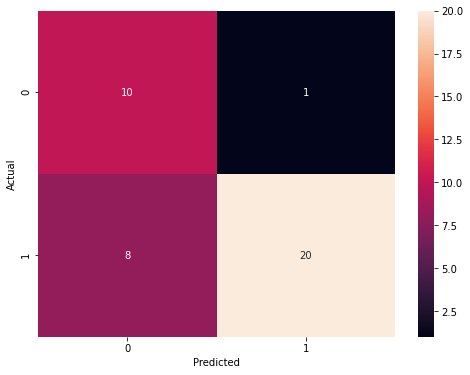

In [26]:
#heatmap visualization 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

cn=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that only 10 out of 11 healthy patients were predicted correct.  
* #### It also shows that only 20 out of 28 diseased patients were predicted correctly with PD.  
***

### Linear Regression

In [27]:
#importing the model
from sklearn.linear_model import LinearRegression
linearRegr=LinearRegression()

In [28]:
#fitting the model
linearRegr.fit(X_train, y_train)

LinearRegression()

In [29]:
#creating the model
y_pred2 = linearRegr.predict(X_test)
y_pred2

array([0.51464502, 0.92291805, 1.08895196, 0.93072429, 0.39722818,
       0.96450257, 0.51665718, 0.73428536, 0.96425774, 0.89648295,
       0.54933081, 1.04009737, 1.02683814, 1.02090193, 0.52986194,
       0.21476581, 1.07171961, 0.93419406, 0.55144217, 0.87538823,
       1.17667136, 0.53241189, 0.40486539, 0.77032915, 0.94973256,
       0.79196182, 0.95604616, 1.05056541, 0.02141046, 0.08635714,
       0.86404109, 0.73424635, 1.07673007, 0.16402396, 0.26651789,
       0.70248981, 0.5602687 , 0.96492844, 0.09659312])

In [30]:
#converting to binary
for i,j in enumerate(y_pred2):
    if(j<0.5):
        y_pred2[i]=0
    else:
        y_pred2[i]=1
print(y_pred2)
y_pred2.shape

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.]


(39,)

In [31]:
#finding accuracy
print("Linear Regression Accuracy : ")
linearRegr.score(X_test,y_test)

Linear Regression Accuracy : 


0.6634994862742111

In [32]:
#finding slopes and intercept
print('slopes:', linearRegr.coef_)
print('Intercept_c: ', linearRegr.intercept_)

slopes: [-1.04534118e-01 -8.64109626e-03 -8.47479945e-02 -8.42742504e-01
 -2.11212157e-01  1.56884203e+01 -1.42137550e-01 -1.46054643e+01
  5.17532503e-01  5.28230731e-02 -4.02387066e+01 -2.09417859e-01
 -7.79932356e-02  4.00157133e+01 -9.44810447e-02 -4.34151524e-02
 -8.18391150e-02  1.28448884e-02  7.56285161e-02  1.01698916e-01
  1.77072618e-02  1.60954993e-01]
Intercept_c:  0.7534122263490168


Text(51.0, 0.5, 'Actual')

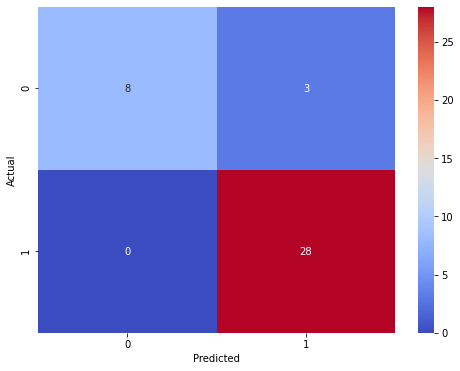

In [33]:
#heatmap visualization 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

cn=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True,cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that 8 out of 11 healthy patients were predicted healthy and 3 were wrongly predicted with PD.  
* #### It also shows that all the diseased patients were predicted correctly with PD.  
***

### Logistic Regression

In [34]:
#importing the model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [35]:
#fitting the model
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [36]:
#creating the model
y_pred3 = logisticRegr.predict(X_test)
y_pred3

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [37]:
#finding accuracy
print("Logistic Regression Accuracy : ")
logisticRegr.score(X_test,y_test)

Logistic Regression Accuracy : 


0.9743589743589743

Text(51.0, 0.5, 'Actual')

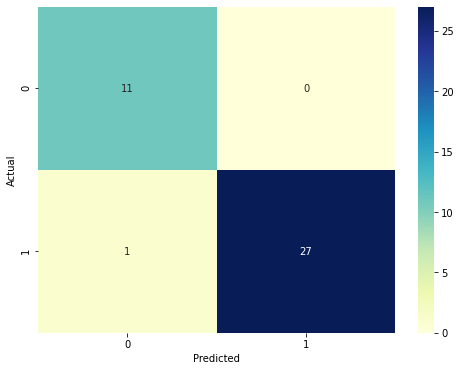

In [38]:
#heatmap visualization 
cn=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that all the healthy patients were predicted as healthy.    
* #### It also shows that 1 out 28 diseased patients were wrongly predicted as healthy.  
***

### Support Vector Machine Classifier (SVM)

In [39]:
#importing the model
from sklearn.svm import SVC
svcclassifier = SVC(kernel='rbf',C=8)

In [40]:
#fitting the model
svcclassifier.fit(X_train,y_train)

SVC(C=8)

In [41]:
#creating the model
y_pred4 = svcclassifier.predict(X_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [42]:
#finding accuracy
print("Support Vector Machines Accuracy : ")
svcclassifier.score(X_test,y_test)

Support Vector Machines Accuracy : 


1.0

Text(51.0, 0.5, 'Actual')

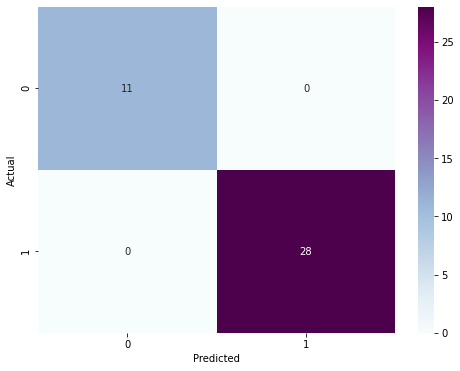

In [43]:
#heatmap visualization 
cn=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True, cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that all the healthy people were predicted correct.    
* #### It also shows that all the diseased patients were predicted correct.  
***

In [44]:
#accuracy score and confusion matrix
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred4))
print(metrics.confusion_matrix(y_test,y_pred4))

1.0
[[11  0]
 [ 0 28]]


In [45]:
#performance measures of classifier
conf_matrix=metrics.confusion_matrix(y_test,y_pred4)
TP=conf_matrix[0,0]
TN=conf_matrix[1,1]
FN=conf_matrix[0,1]
FP=conf_matrix[1,0]

sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
pred_val=TN/(TN+FN)
accuracy=(TP+FN)/(TP+TN+FP+FN)

print("SENSITIVITY     : %f"%(sensitivity))
print("SPECIFICITY     : %f"%(specificity))
print("PRECISION       : %f"%(precision))
print("PREDICTE VALUE  : %f"%(pred_val))
print("ACCURCY         : %f"%(accuracy))
print("\nPrecision       :",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred4))
print("RECALL SCORE    :", metrics.recall_score(y_test, y_pred4))
print("F1 SCORE        :",metrics.f1_score(y_test, y_pred4))

SENSITIVITY     : 1.000000
SPECIFICITY     : 1.000000
PRECISION       : 1.000000
PREDICTE VALUE  : 1.000000
ACCURCY         : 0.282051

Precision       : 1.0
PRECISION SCORE : 1.0
RECALL SCORE    : 1.0
F1 SCORE        : 1.0


### Decision Tree Model

In [46]:
#importing the model
from sklearn import tree
d_tree = tree.DecisionTreeClassifier()

In [47]:
#fitting the model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
#creating the model
y_pred5 = d_tree.predict(X_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [49]:
#finding accuracy
print("Decision Tree Accuracy : ")
d_tree.score(X_test,y_test)

Decision Tree Accuracy : 


0.9230769230769231

Text(51.0, 0.5, 'Actual')

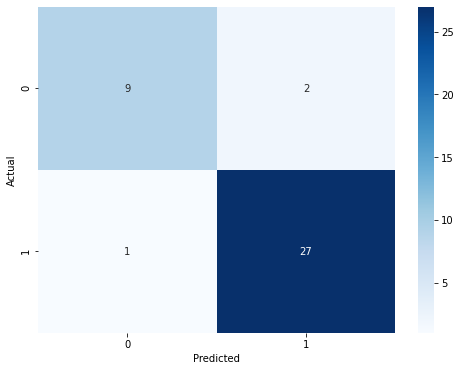

In [50]:
#heatmap visualization 
cn=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that only 9 out 11 healthy people were predicted correctly and the rest were predicted wrongly with PD.    
* #### It also shows that 1 out 28 diseased patients were wrongly predicted as healthy.  
***

### XG Boost Classification

In [51]:
#importing the model
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [52]:
#fitting the model
xgb.fit(X_train,y_train)

[20:01:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abirami/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
#creating the model
y_pred6 = xgb.predict(X_test)
y_pred6

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [54]:
#finding accuracy
print("XGBoost Classification Accuracy : ")
xgb.score(X_test,y_test)

XGBoost Classification Accuracy : 


1.0

Text(51.0, 0.5, 'Actual')

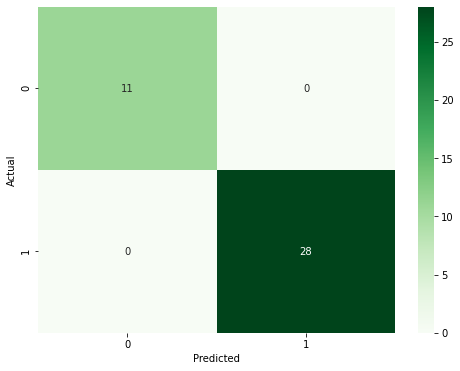

In [55]:
#heatmap visualization 
cn=confusion_matrix(y_test,y_pred6)
plt.figure(figsize=(8,6))
fg=sn.heatmap(cn,annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* #### The heatmap shows that all the healthy people were predicted correct.    
* #### It also shows that all the diseased patients were predicted correct.  
***

## All Model Accuracies:

In [56]:
print("\n Linear Regression Accuracy           : %.2f %%" % (linearRegr.score(X_test,y_test)*100))
print(" Naive Bayes Classification Accuracy  : %.2f %%" % (nbc.score(X_test,y_test)*100))
print(" Decision Tree Accuracy               : %.2f %%" % (d_tree.score(X_test,y_test)*100))
print(" Logistic Regression Accuracy         : %.2f %%" % (logisticRegr.score(X_test,y_test)*100))
print(" Support Vector Machines Accuracy     : %.1f %%" % (svcclassifier.score(X_test,y_test)*100))
print(" XGBoost Classification Accuracy      : %.1f %%\n" % (xgb.score(X_test,y_test)*100))


 Linear Regression Accuracy           : 66.35 %
 Naive Bayes Classification Accuracy  : 76.92 %
 Decision Tree Accuracy               : 92.31 %
 Logistic Regression Accuracy         : 97.44 %
 Support Vector Machines Accuracy     : 100.0 %
 XGBoost Classification Accuracy      : 100.0 %



### Observations:

From the above observations it is clear that the **Support Vector Machines Model** and the **XGBoost Model** gave the highest accuracy of **100%** for this particular dataset.

So for the further calculations of prediction we can use any one these methods to predict the status of a person when given the observations of a person as the input.

Here we have selected the **<font color=red>Support vector Machines</font>** method to predict from our model.

***

## Prediciting from the SVM model

In [57]:
#input = (119.992,157.302,74.997,0.00784,7E-05,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
input = (214.289,260.277,77.973,0.00567,3E-05,0.00295,0.00317,0.00885,0.01884,0.19,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569)

# changing input data to a numpy array
input_array = np.asarray(input)

# reshape the numpy array
input_reshaped = input_array.reshape(1,-1)

# standardize the data
std_input = stdscalar.transform(input_reshaped)

#predict the status
prediction = svcclassifier.predict(std_input)

#display the result
print(prediction)
if (prediction[0] == 0):
  print("\n RESULT: The Person does not have Parkinsons Disease.")
else:
  print("\n RESULT: The Person has Parkinsons Disease.")

[0]

 RESULT: The Person does not have Parkinsons Disease.


***

## Saving The Model

In [58]:
# Saving the  model as a pickle file
import pickle
pickle_file = open("svm_model.pkl","wb")
pickle.dump(svcclassifier, pickle_file)
pickle_file.close()

***
*Thank You!*